In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

## We need to ask important questions before starting our analysis 

1.) What was the change in price of the stock over time?

2.) What was the moving average of the various stocks?

3.) What was the daily return of the stock on average?

4.) What was the correlation between different stocks?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price using LSTM)

# Import libraries

In [6]:
# import pyforst to import the full package for EDA and ML
!pip install pyforest


  Using cached pyforest-1.1.0.tar.gz (15 kB)
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=fed25073c4fee53ed5720268351f5147f47ce1d7266afac13fb9de67b75ba4ec
  Stored in directory: c:\users\khali_000\appdata\local\pip\cache\wheels\d5\1a\3e\6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest


In [12]:
#importing all libs thenUsing lazy func in pyforest to checkthe lib details
from pyforest import *
lazy_imports()

['from sklearn import svm',
 'from pathlib import Path',
 'import dash',
 'import keras',
 'from sklearn.linear_model import ElasticNet',
 'import imutils',
 'from xlrd import open_workbook',
 'import matplotlib as mpl',
 'import lightgbm as lgb',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import xgboost as xgb',
 'import seaborn as sns',
 'from pyspark import SparkContext',
 'from sklearn.linear_model import LogisticRegression',
 'import pandas as pd',
 'import fastai',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import pydot',
 'import spacy',
 'import glob',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import torch',
 'import textblob',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.model_selection import train_test_split',
 'import plotly as py',
 'from PIL import Image',
 'from scipy import stats',
 'import altair as alt',
 'import skimage',
 'f

In [19]:
# After checking the libs needed we are going to add yfinance LIB For reading stock data from yahoo
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
!pip install pandas-datareader
from pandas_datareader.data import DataReader

!pip install yfinance
import yfinance as yf

# For time stamps
from datetime import datetime

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1.) What was the change in price of the stock over time?

In [21]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


We have extracted the data for Apple, Google, Microsoft and Amazon we are going to Ask each stock the EDA questions and dicide which one is better in investing 

Let go and analyze first Apple stock dataset 

In [33]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

<IPython.core.display.Javascript object>

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-23 00:00:00-04:00,116.000000,116.050003,112.059998,113.779999,113.779999,65081200,AMAZON
2022-09-26 00:00:00-04:00,113.300003,117.339996,113.129997,115.150002,115.150002,62723300,AMAZON
2022-09-27 00:00:00-04:00,117.199997,118.320000,113.050003,114.410004,114.410004,60094700,AMAZON
2022-09-28 00:00:00-04:00,114.379997,118.699997,113.800003,118.010002,118.010002,55763800,AMAZON
2022-09-29 00:00:00-04:00,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,AMAZON
2022-09-30 00:00:00-04:00,114.080002,116.919998,112.839996,113.000000,113.000000,59409800,AMAZON
2022-10-03 00:00:00-04:00,113.580002,116.910004,112.449997,115.879997,115.879997,50941900,AMAZON
2022-10-04 00:00:00-04:00,119.889999,123.000000,119.790001,121.089996,121.089996,62812600,AMAZON
2022-10-05 00:00:00-04:00,118.580002,121.750000,117.690002,120.949997,120.949997,48133700,AMAZON


In [34]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-10-06 00:00:00-04:00,139.470001,142.149994,138.369995,142.000000,141.208740,83221100,APPLE
2021-10-07 00:00:00-04:00,143.059998,144.220001,142.720001,143.289993,142.491547,61732700,APPLE
2021-10-08 00:00:00-04:00,144.029999,144.179993,142.559998,142.899994,142.103699,58773200,APPLE
2021-10-11 00:00:00-04:00,142.270004,144.809998,141.809998,142.809998,142.014206,64452200,APPLE
2021-10-12 00:00:00-04:00,143.229996,143.250000,141.039993,141.509995,140.721451,73035900,APPLE


In [35]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,158.411383,160.514190,156.548004,158.627925,158.219804,8.910948e+07
std,12.430946,12.338726,12.312524,12.294676,12.207524,2.677798e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,3.987610e+07
25%,148.809998,150.130005,147.479996,148.960007,148.503723,7.017050e+07
50%,159.570007,161.800003,156.529999,159.220001,158.845657,8.444270e+07
75%,169.080002,171.050003,167.139999,168.880005,168.490005,1.017869e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


In [36]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,127.161339,128.747491,125.524442,127.081150,127.081150,2.730695e+07
std,15.305482,15.106765,15.199883,15.140989,15.140989,1.030344e+07
min,97.220001,99.300003,96.029999,96.150002,96.150002,1.004510e+07
25%,113.710503,115.930000,112.444000,114.137001,114.137001,2.040800e+07
50%,130.000000,131.748993,127.153503,129.121002,129.121002,2.497000e+07
75%,140.849747,142.610504,139.699493,141.412003,141.412003,3.169870e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,8.975000e+07


In [39]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,289.680514,292.960158,285.947549,289.545158,288.266061,3.011232e+07
std,29.178685,28.957830,29.185082,29.175776,28.426371,1.077220e+07
min,235.410004,239.949997,232.729996,232.899994,232.899994,1.061990e+07
25%,265.239990,267.450012,261.600006,264.839996,264.328949,2.275420e+07
50%,289.109985,291.910004,285.000000,288.500000,287.219940,2.835120e+07
75%,309.630005,312.380005,306.459991,310.200012,308.178986,3.462750e+07
max,344.619995,349.670013,342.200012,343.109985,340.882812,9.042890e+07


In [41]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,143.877239,146.107730,141.556570,143.774633,143.774633,7.155080e+07
std,23.323322,23.150935,23.364081,23.200005,23.200005,3.164459e+07
min,102.750000,104.580002,101.260002,102.309998,102.309998,2.353632e+07
25%,122.401001,123.870003,120.029999,122.279999,122.279999,5.255200e+07
50%,145.443497,147.985001,142.070496,144.826996,144.826996,6.281260e+07
75%,165.122498,166.494995,163.666000,164.992996,164.992996,8.054800e+07
max,185.634506,188.107498,183.785995,184.802994,184.802994,2.726620e+08


### After reading the stats for each company we are going to  answer the first question for apple 

In [43]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-10-06 00:00:00-04:00 to 2022-10-06 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [45]:
# stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,158.411383,160.514190,156.548004,158.627925,158.219804,8.910948e+07
std,12.430946,12.338726,12.312524,12.294676,12.207524,2.677798e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,3.987610e+07
25%,148.809998,150.130005,147.479996,148.960007,148.503723,7.017050e+07
50%,159.570007,161.800003,156.529999,159.220001,158.845657,8.444270e+07
75%,169.080002,171.050003,167.139999,168.880005,168.490005,1.017869e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

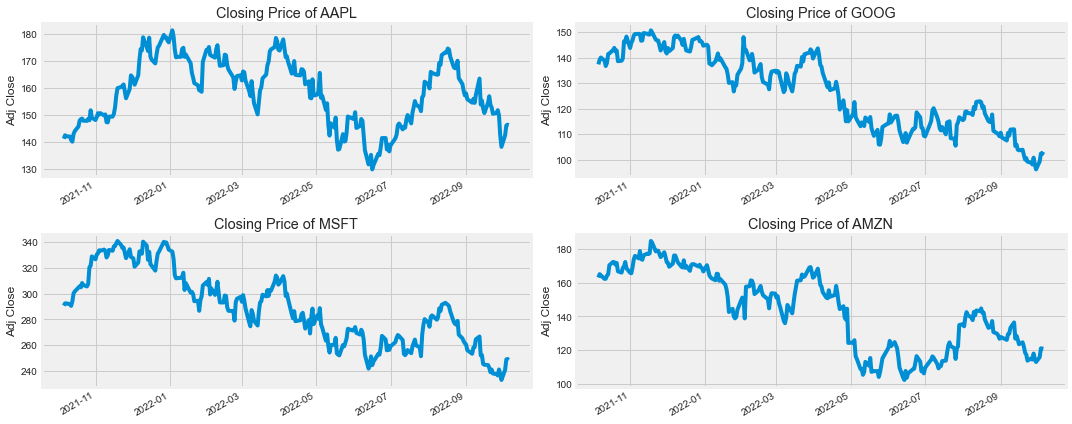

In [46]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

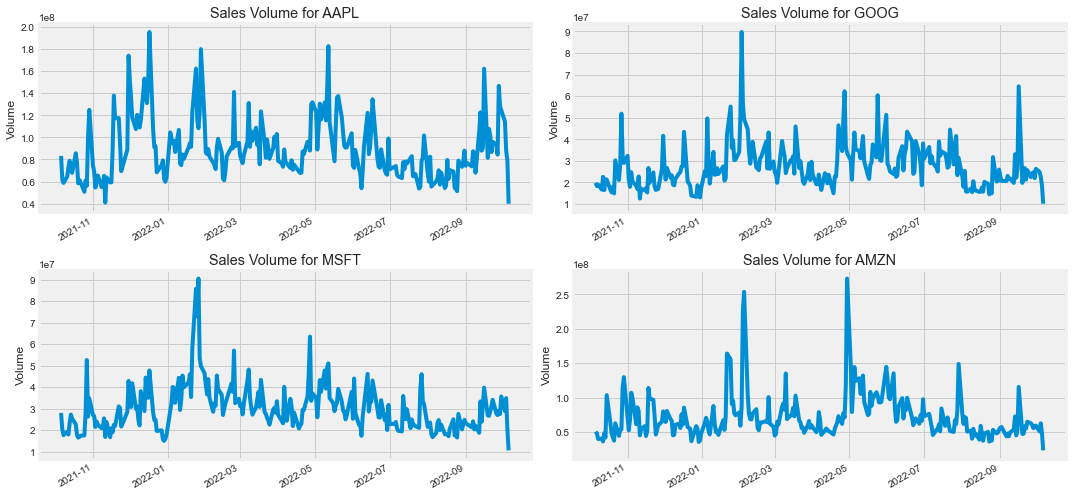

In [47]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

### 2.) What was the moving average of the various stocks?

In [48]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [53]:
#check added value fo MA's
print(GOOG.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


In [54]:
print(AAPL.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

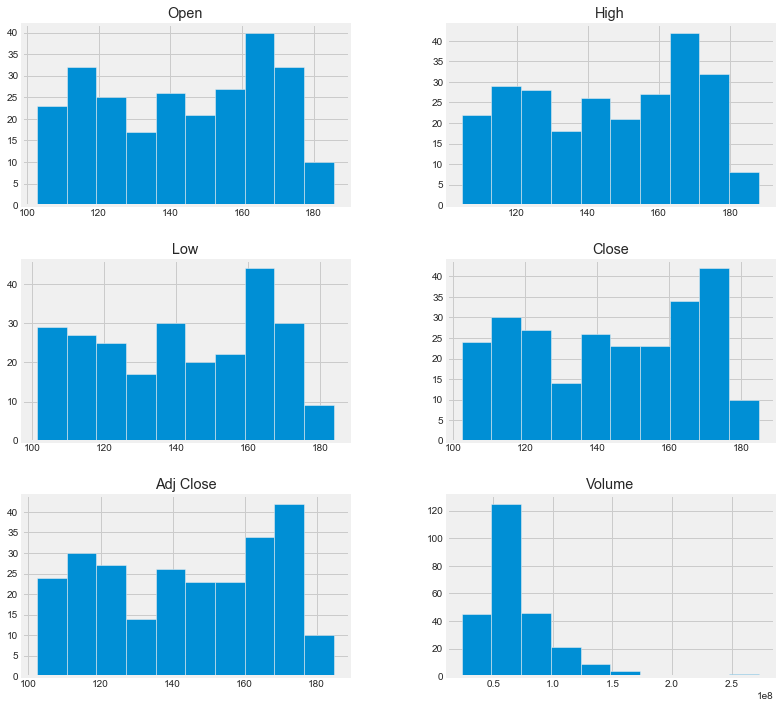

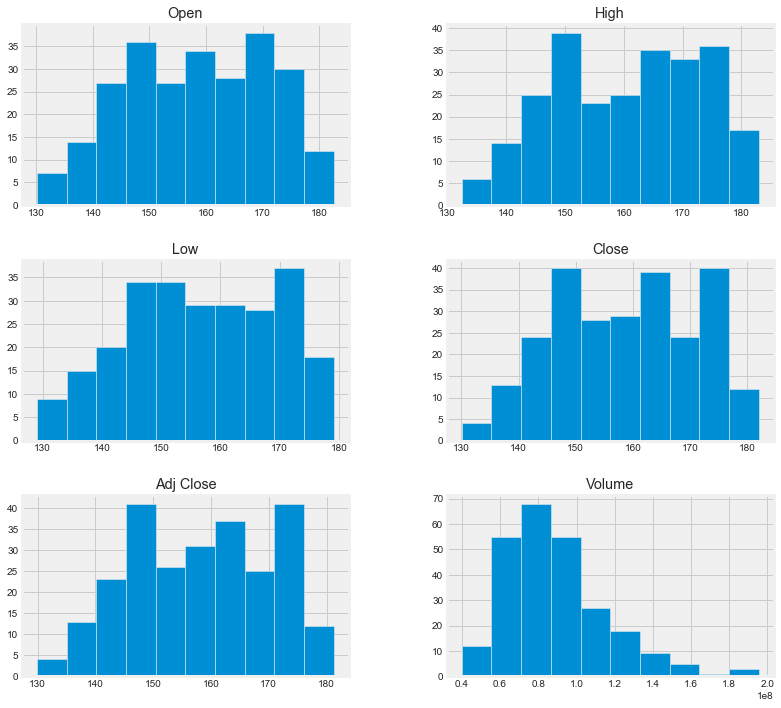

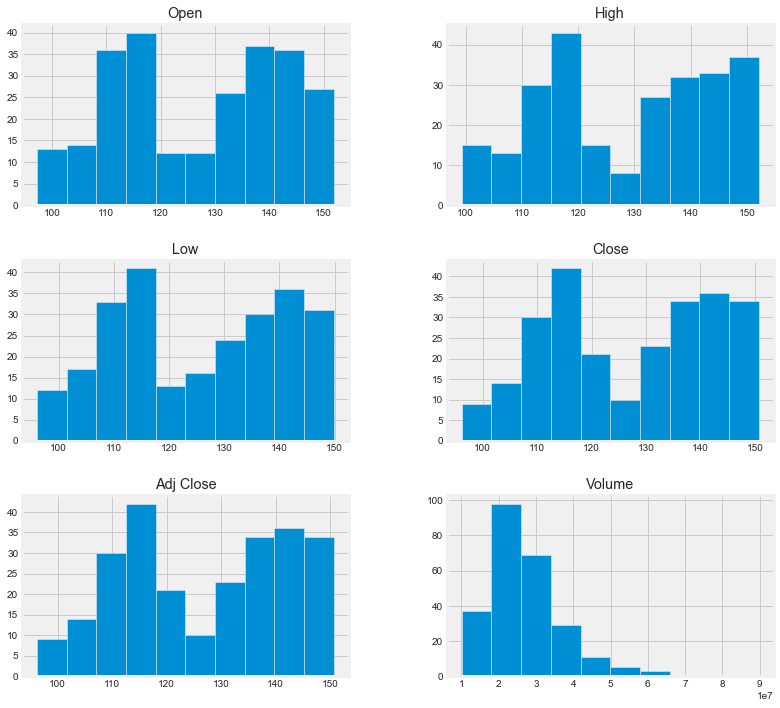

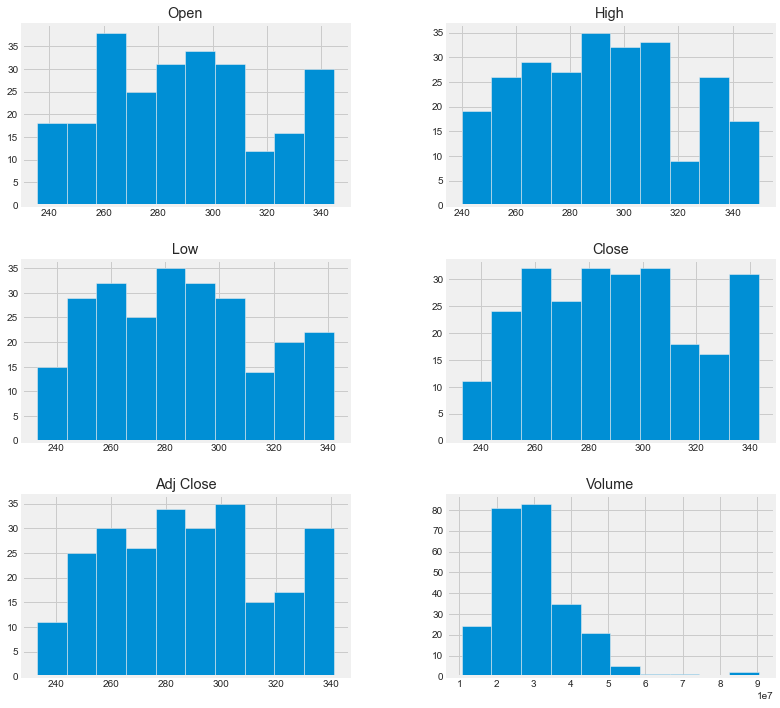

In [57]:
# 
df.groupby("company_name").hist(figsize=(12, 12));

<IPython.core.display.Javascript object>

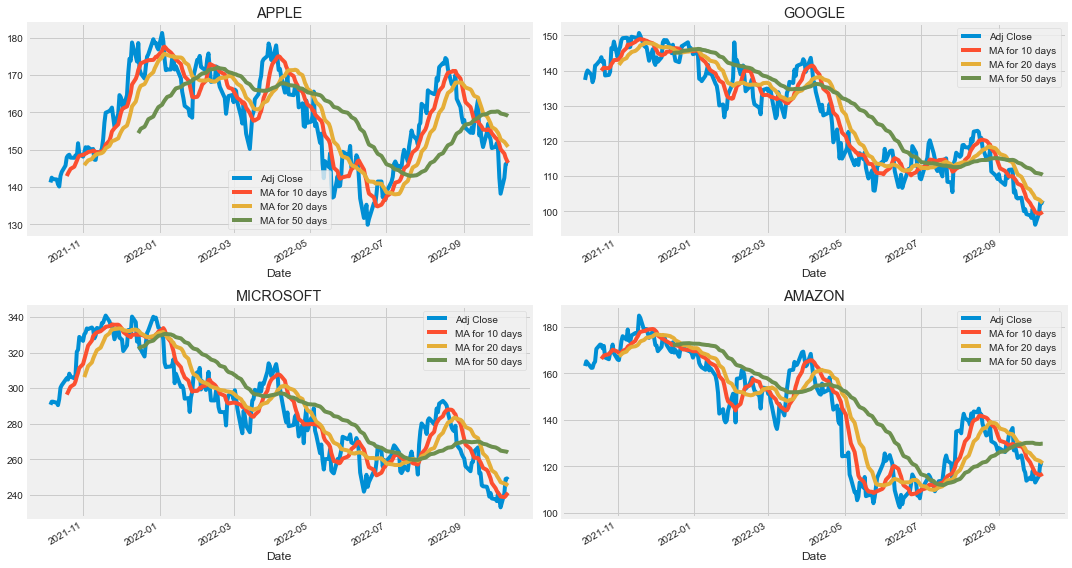

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### 3.) What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

<IPython.core.display.Javascript object>

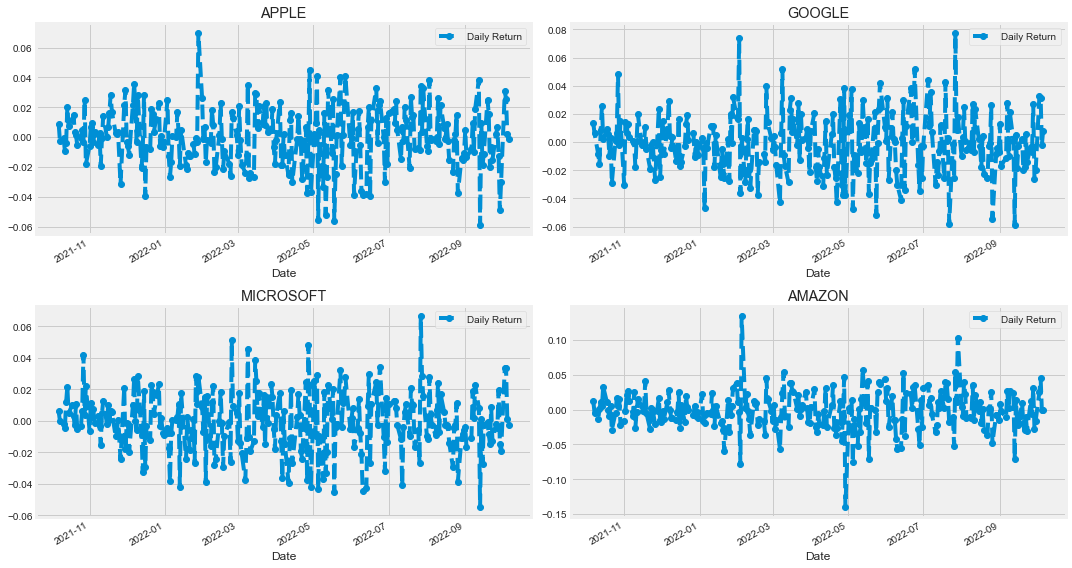

In [61]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

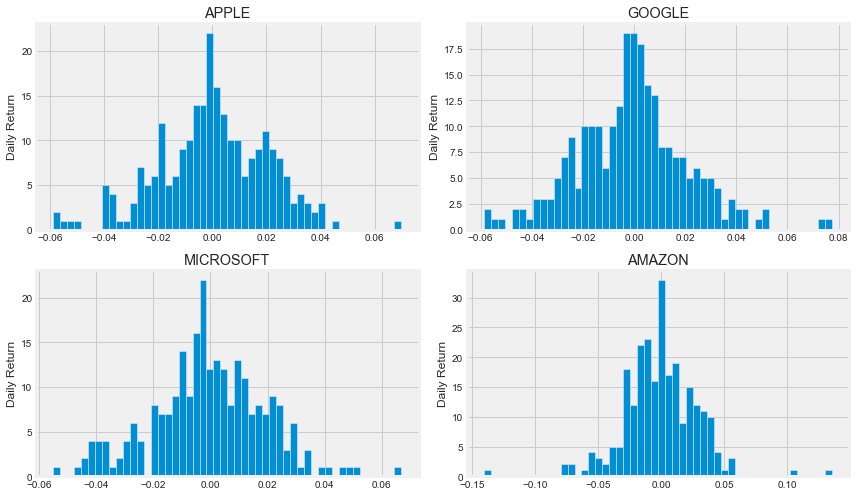

In [64]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

### 4.) What was the correlation between different stocks?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [67]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-10-06,141.208725,137.354004,290.675537,163.100494
2021-10-07,142.491531,139.185501,292.401154,165.121506
2021-10-08,142.103699,140.056000,292.401154,164.431000
2021-10-11,142.014206,138.847504,291.786316,162.315002
2021-10-12,140.721466,136.712997,290.447479,162.366501


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [68]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-10-06,NaN,NaN,NaN,NaN
2021-10-07,0.009084,0.013334,0.005937,0.012391
2021-10-08,-0.002722,0.006254,0.000000,-0.004182
2021-10-11,-0.000630,-0.008629,-0.002103,-0.012869
2021-10-12,-0.009103,-0.015373,-0.004588,0.000317


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

<IPython.core.display.Javascript object>

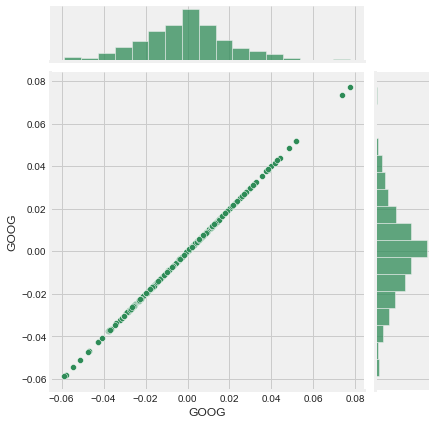

In [69]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

<IPython.core.display.Javascript object>

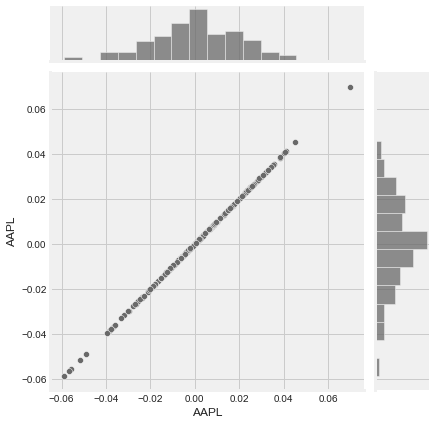

In [73]:
# Comparing Apple to itself should show a perfectly linear relationship
sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter', color='dimgrey')

<IPython.core.display.Javascript object>

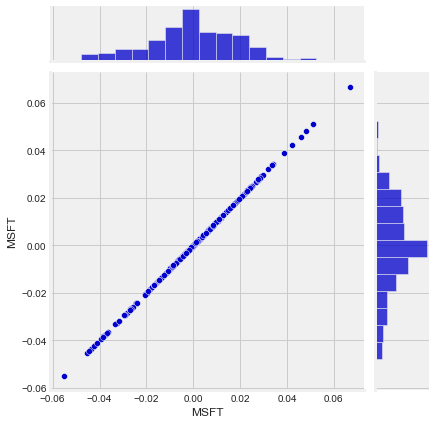

In [75]:
# Comparing Microsoft to itself should show a perfectly linear relationship
sns.jointplot(x='MSFT', y='MSFT', data=tech_rets, kind='scatter', color='mediumblue')

<IPython.core.display.Javascript object>

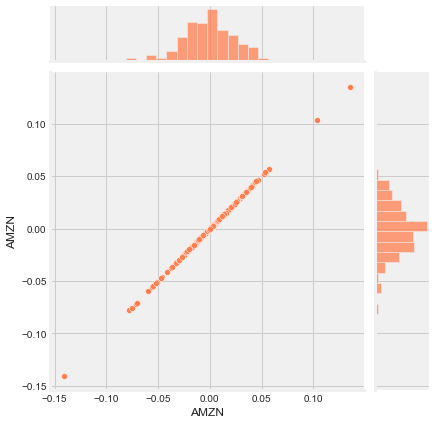

In [76]:
# Comparing Amazon to itself should show a perfectly linear relationship
sns.jointplot(x='AMZN', y='AMZN', data=tech_rets, kind='scatter', color='coral')

<IPython.core.display.Javascript object>

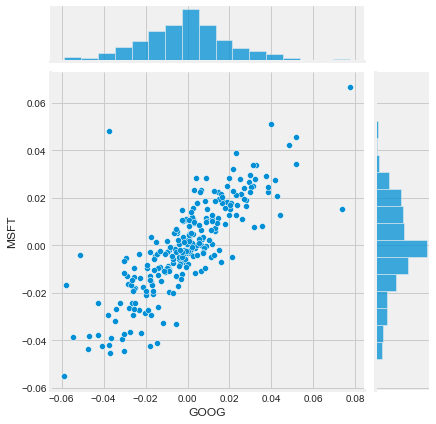

In [77]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

<IPython.core.display.Javascript object>

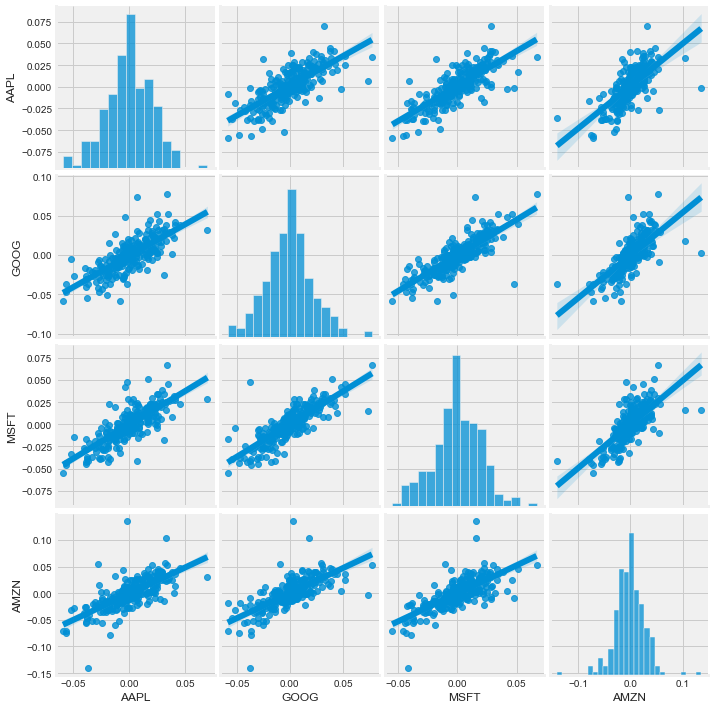

In [78]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

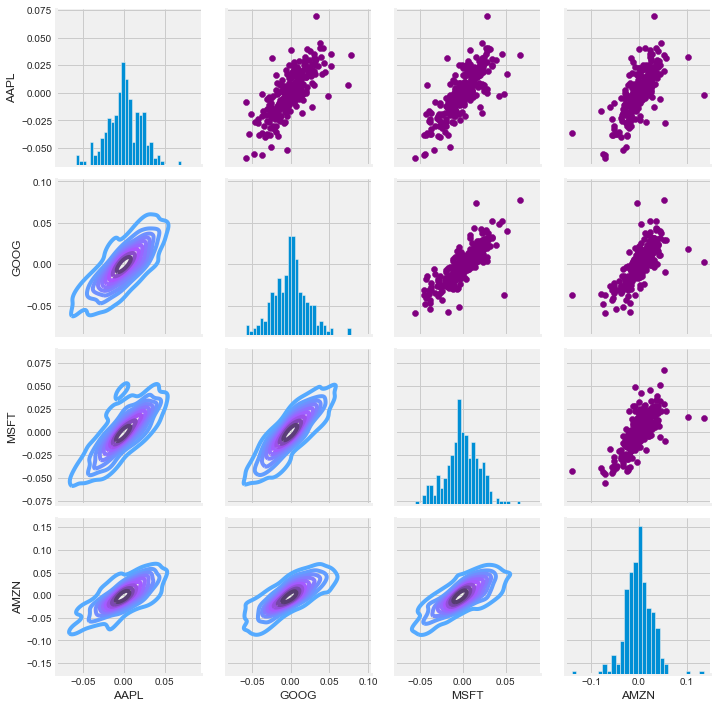

In [79]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

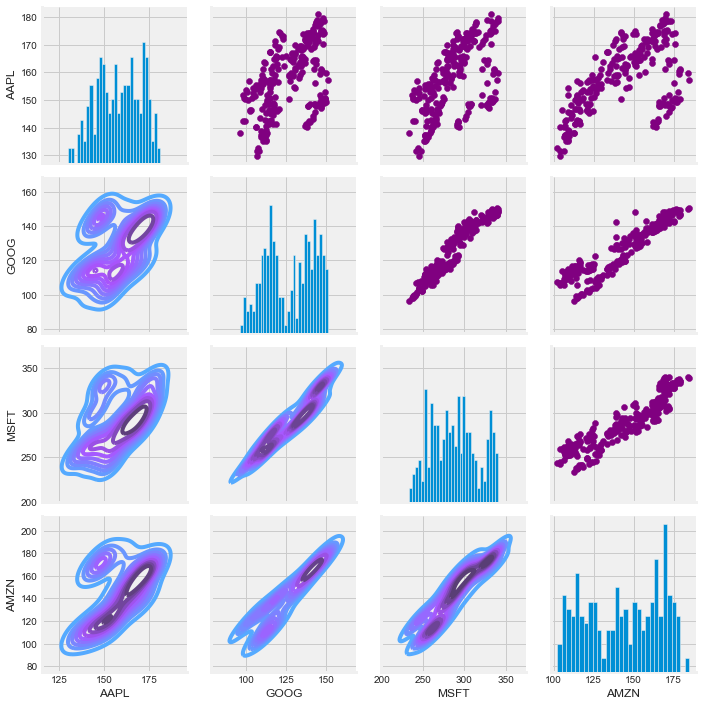

In [80]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

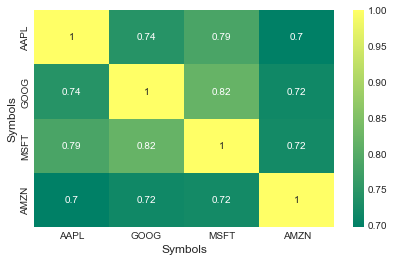

In [81]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

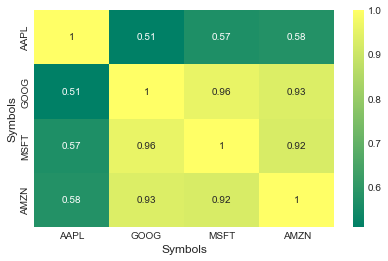

In [82]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

### 5.) How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

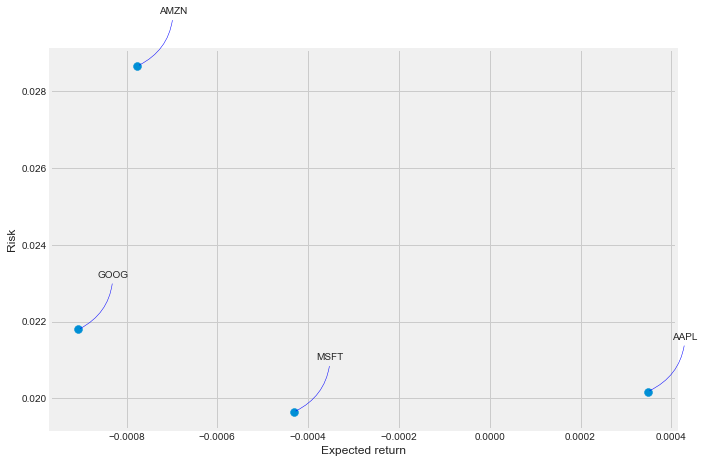

In [84]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### 6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [85]:
# Get the stock quote
df_A = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show the data
df_A

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540045
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607440
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747402
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880662
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860235
...,...,...,...,...,...,...
2022-09-30,143.100006,138.000000,141.279999,138.199997,124705400.0,138.199997
2022-10-03,143.070007,137.690002,138.210007,142.449997,114311700.0,142.449997
2022-10-04,146.220001,144.259995,145.029999,146.100006,87830100.0,146.100006


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

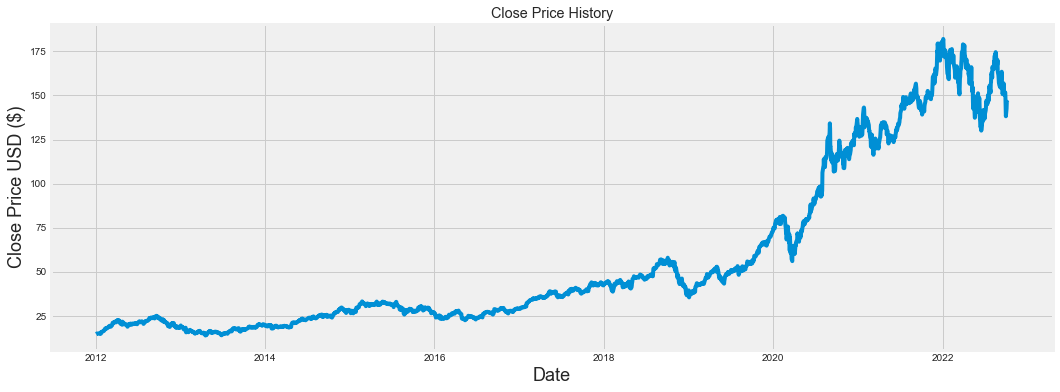

In [86]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_A['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [87]:
# Create a new dataframe with only the 'Close column 
data = df_A.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

<IPython.core.display.Javascript object>

2574

In [88]:
#scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

<IPython.core.display.Javascript object>

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.78632955],
       [0.78811453],
       [0.78507998]])

In [89]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
!pip install keras
# Download TF package
!pip install –upgrade pip
!pip install tensorflow

ERROR: Invalid requirement: '–upgrade'


In [102]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2514/2514 [==============================] - 110s 40ms/step - loss: 0.0012


In [103]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5/5 [==============================] - 5s 107ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

8.651947830113212

C:\Users\KHALI_~1\AppData\Local\Temp/ipykernel_7440/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

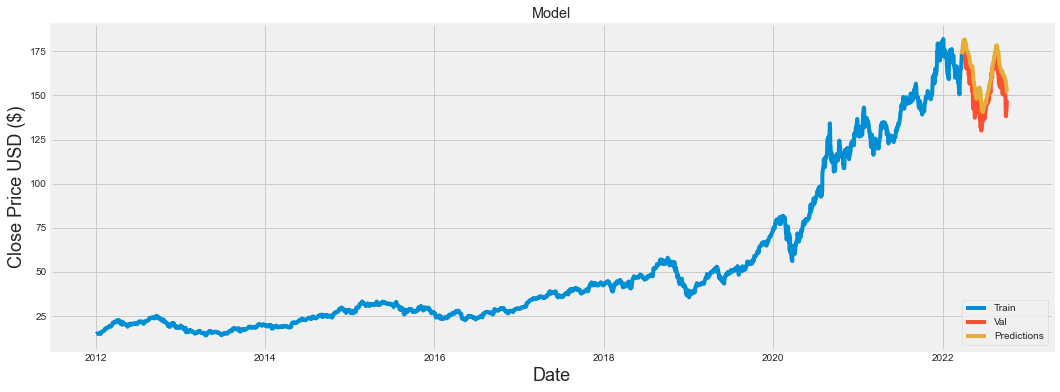

In [104]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [105]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-25,174.720001,173.303696
2022-03-28,175.600006,175.471039
2022-03-29,178.960007,177.334274
2022-03-30,177.770004,179.272919
2022-03-31,174.610001,180.721359
...,...,...
2022-09-30,138.199997,156.740005
2022-10-03,142.449997,154.203506
2022-10-04,146.100006,152.344315
